In [1]:
from google.colab import files
uploaded = files.upload()

Saving Unemployment in India.csv to Unemployment in India.csv


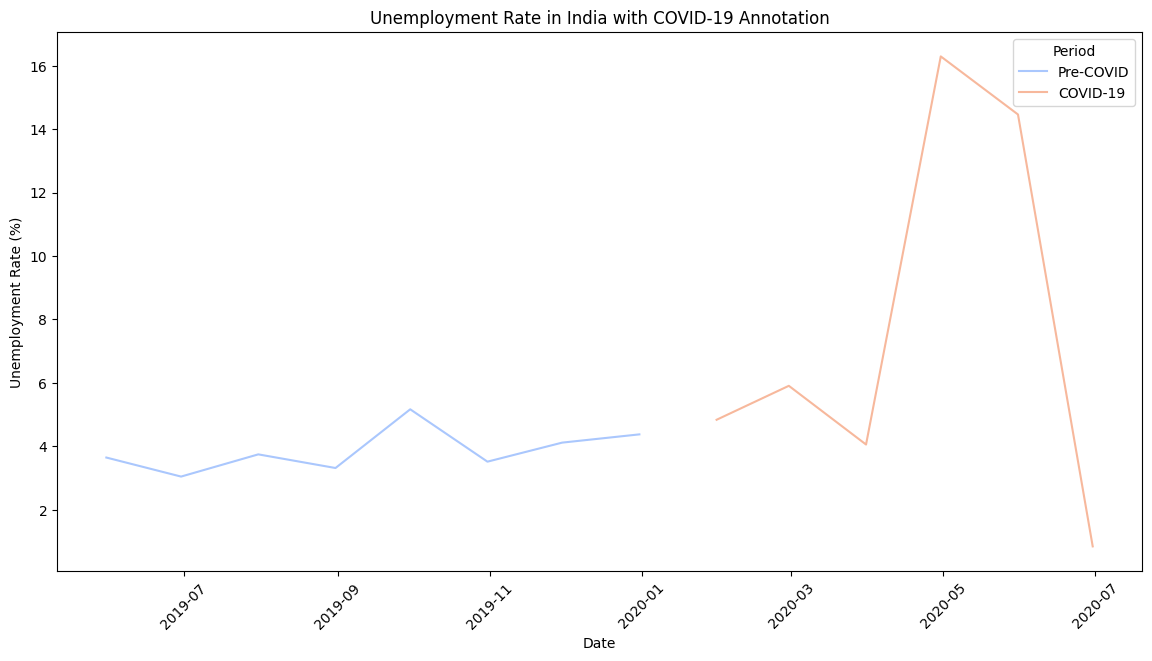

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


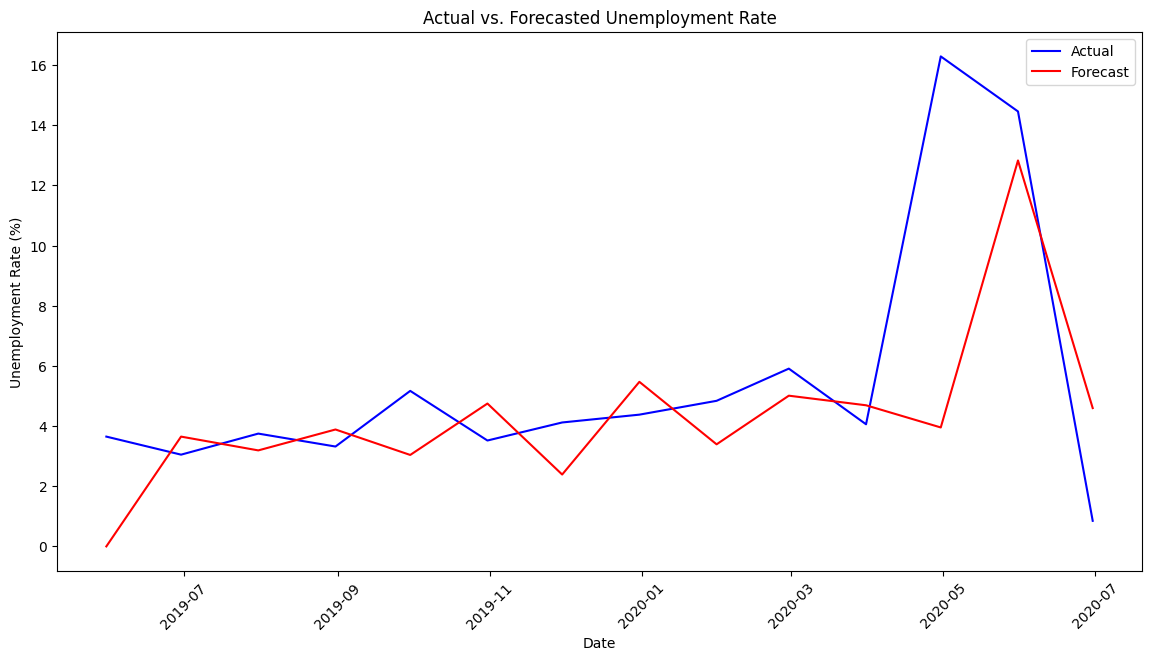

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
df = pd.read_csv('Unemployment in India.csv')

# Clean column names
df.columns = df.columns.str.strip()

# Drop rows with missing unemployment rates
df = df.dropna(subset=['Estimated Unemployment Rate (%)'])

# Clean leading/trailing spaces in 'Date' column and convert 'Date' to datetime format
df['Date'] = df['Date'].str.strip()  # Remove leading/trailing spaces
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')  # Specify dayfirst=True

# Drop rows where conversion to datetime failed
df = df.dropna(subset=['Date'])

# Reset index
df = df.reset_index(drop=True)

# Remove duplicate dates (keeping the first occurrence)
df = df.drop_duplicates(subset='Date', keep='first')

# Sort by Date
df = df.sort_values(by='Date')

# Set the date column as index
df = df.set_index('Date')

# Set frequency for the date index (assuming monthly data)
df = df.asfreq('M')

# Convert index to Series to use .apply()
df['Year'] = df.index.to_period('M').strftime('%Y')
df['COVID-19'] = df['Year'].apply(lambda x: 'COVID-19' if x in ['2020', '2021'] else 'Pre-COVID')

# Drop the 'Year' column as it is no longer needed
df = df.drop(columns=['Year'])

# Plot unemployment rate with COVID-19 annotation
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x=df.index, y='Estimated Unemployment Rate (%)', hue='COVID-19', palette='coolwarm')
plt.title('Unemployment Rate in India with COVID-19 Annotation')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Period')
plt.show()

# Fit ARIMA model
model = ARIMA(df['Estimated Unemployment Rate (%)'], order=(5, 1, 0))  # Adjust order as needed
model_fit = model.fit()

# Make predictions
df['Forecast'] = model_fit.predict(start=0, end=len(df)-1, typ='levels')

# Plot actual vs. forecasted unemployment rates
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Estimated Unemployment Rate (%)'], label='Actual', color='blue')
plt.plot(df.index, df['Forecast'], label='Forecast', color='red')
plt.title('Actual vs. Forecasted Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.xticks(rotation=45)
plt.show()
